In [83]:

using Jacobi
using PyPlot
#using Interact
using DataFrames
include("../../HPFEM.jl/src/HPFEM.jl")
include("../src/HPFEM_mod.jl")


lagrange_oed_neum_spec (generic function with 5 methods)

In [120]:
idir = [1]  ### A: Só um lado é Dirichilet o outro é Neumann
M = 10
Q = M+2
nel = 2
k = 2
uexact(x) = cos(10* x) .* sin(25* x)
rhsfun(x) =  726*cos(10*x).*sin(25*x) + 500*sin(10*x) .* cos(25 *x)
duexact(x) = 25*cos(10*x) .* cos(25*x) - 10 *sin(10*x) .* sin(25 *x) ### A: Precisamos agora conhecer a derivada (pelo menos no ponto)
a = 1.7
b = 6.3


linspace(a,b,nel+1)
nnodes = nel +1
nodes = [Float64(x) for x in linspace(a, b, nnodes)];

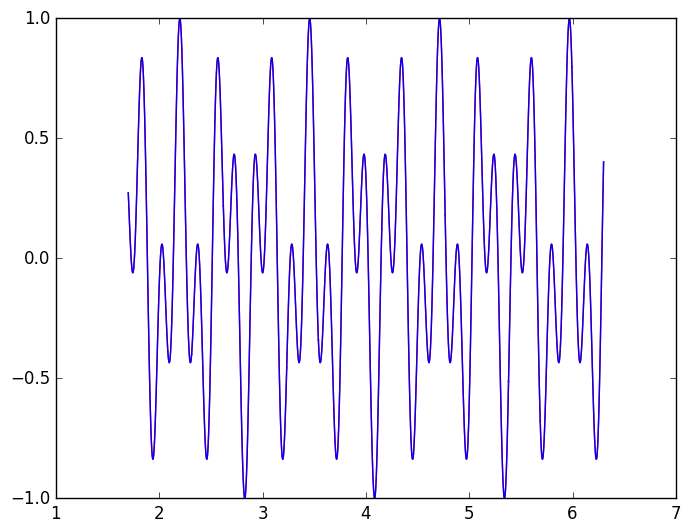

5.237565359095253e-5

In [121]:
M= 13
Q = M + 2
nel = 15
lagrange_oed_neum_plot(M, Q, nel, rhsfun, uexact, duexact,a,b,idir)

In [98]:
data = DataFrame(erro =Float64[],dof = Float64[])
for nel in 1:100
    M = 40
    Q = M + 2
    t = lagrange_oed_neum_spec(M, Q, nel, rhsfun, uexact, duexact,a,b,idir)
    push!(data,t)
end


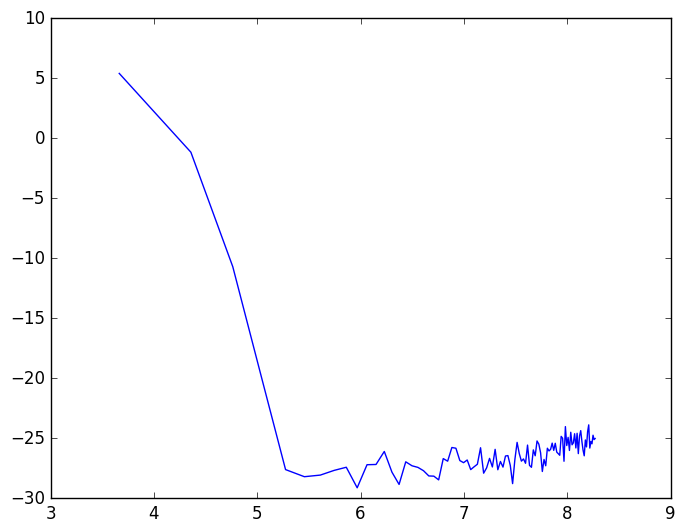

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7409d25e10>

In [99]:
plot(log(data[:dof]),log(data[:erro]))